'\nGas molecules will eventually be uniformly distributed in the space.\n'

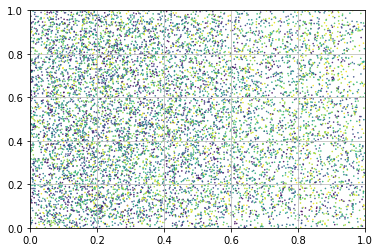

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# constants
time = 200
N = 10000
step = 0.05


class Particle:
    def __init__(self):
        self.position = [np.random.uniform(0, 0.5), np.random.uniform(0, 1)]

    def move(self):
        x = self.position[0]
        y = self.position[1]
        move_choice = np.random.randint(4)
        if move_choice == 0:
            self.position = [x, y + step]
        elif move_choice == 1:
            self.position = [x, y - step]
        elif move_choice == 2:
            self.position = [x + step, y]
        elif move_choice == 3:
            self.position = [x - step, y]

        if self.position[0] > 1 or self.position[0] < 0 or self.position[1] > 1 or self.position[1] < 0:
            self.position = [x, y]
            self.move()

class Particles:
    def __init__(self):
        self.particles = []
        for i in range(N):
            self.particles.append(Particle())

    def simulate(self):
        # set up plot
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.grid(True, linestyle='-', color='0.75')
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1])
        x = []
        y = []
        for i in range(N):
            x.append(self.particles[i].position[0])
            y.append(self.particles[i].position[1])
        scat = plt.scatter(x, y, c=x, s=0.3)

        def _update_plot(i, fig, scat):
            pos = []
            for index in range(N):
                self.particles[index].move()
                pos.append(self.particles[index].position)

            scat.set_offsets(np.array(pos))
            return scat,

        anim = animation.FuncAnimation(fig, _update_plot, fargs=(fig, scat), frames=time, interval=60)
        anim.save('disorder.gif', writer='imagemagick')

def main():
    try1 = Particles()
    try1.simulate()

if __name__ == "__main__":
    main()

'''
Gas molecules will eventually be uniformly distributed in the space.
'''